<a href="https://colab.research.google.com/github/Taofika/Taofika.github.io/blob/main/DAV_Obesty_Levels_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 807 kB/s 


In [ ]:
#Importing all the libraries to be used

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr
import plotly.express as px
import plotly
import plotly.graph_objects as go
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data
import collections
from collections import Counter
from sklearn.model_selection import cross_val_score


from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder

import plotly.express as px
import plotly

# libraries for MLP Classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#libraries for MLP Regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# libraries Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn import tree

#libraries for Linear regression
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm #For multiple linear regression

from sklearn.linear_model import LogisticRegression#For Logistics regression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


#libraries for normalizing data
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


### Reading my Obesity Dataset

In [ ]:
#to read the first 5 rows
Obese = pd.read_csv("/content/grive/MyDrive/Absola Data Science/DAV/DavAsignment/ObesityDataSet.csv")
Obese.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#to read the last 5 rows
Obese = pd.read_csv("/content/grive/MyDrive/Absola Data Science/DAV/DavAsignment/ObesityDataSet.csv")
Obese.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#The aim of this reseaarch is to estimate Obesity level using machine learning techqniques
#The dataset is for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia,
#based on their eating habits and physical condition.
#The data contains 17 attributes and 2111 records,
#The code below shows the features for my data set
for c in Obese.columns:
    print(c)

Gender
Age
Height
Weight
family_history_with_overweight
FAVC
FCVC
NCP
CAEC
SMOKE
CH2O
SCC
FAF
TUE
CALC
MTRANS
NObeyesdad


### DATA DICTIONARY FOR MY DATASET

This section shows the independent variables and the dependent variable

INDEPENDENT VARIABLES

Gender - (Male/Female), Age - In years, Height - In meters, Weight - In Kgs

family_history_with_overweight - Family history in obesity - Yes or No

FAVC - Frequent consumption of high caloric food - Yes/No

FCVC - Frequency of consumption of vegetables - 1 = never, 2 = sometimes, 3 = always

NCP - Number of main meals - 1, 2, 3 or 4 meals

CAEC - Consumption of food between meals - No, Sometimes, Frequently,

Always Smoke - Does the person smoke - Yes/No

CH20 - Consumption of water daily - 1 = less than a liter, 2 = 1–2 liters, 3 = more than 2 liters

SCC - Calories consumption monitoring - Yes/No

FAF - Physical activity frequency - 0 = none, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days

TUE - Time using technology devices - 0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours

CALC - Consumption of alcohol - No, Sometimes, Frequently and Always

MTRANS - Transportation used - Public Transportation, Motorbike, Bike, Automobile and Walking

###DEPENDENT VARIABLES

NObeyesdad - Obesity level - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III

#### Attributes related with the physical condition are:
Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

#### Attributes related with eating habits are
Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),

Consumption of alcohol (CALC).

### DATA CLEAN UP

In [ ]:
#check for the array dimensions
Obese.shape

(2111, 17)

In [ ]:
# To check for missing values
Obese.isnull()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# To check for sum of missing  values, No missing values
Obese.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
#To rename some of the columns i.e NObeyesdad and family_history_with_overweight
Obese.columns = ('Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O','SCC','FAF', 'TUE','CALC', 'MTRANS', 'OBESITY')
Obese

,Gender,Age,Height,Weight,Family History with Overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,OBESITY
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#Check numbers of duplicated rows
dup_Obese = Obese[Obese.duplicated()]
print(dup_Obese.shape)

(24, 17)


In [ ]:
#delete duplicates
Obese = Obese.drop_duplicates(keep='last')

In [ ]:
#Check duplicated rows have been deleted
dup_Obese = Obese[Obese.duplicated()]
print(dup_Obese.shape)

(0, 17)


### DESCRIPTIVE STATISTIC

In [ ]:
#Describing the dataset
Obese.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
#Normalizting the data
#Normalization places the features of the data on a smaller scale,
cols_to_norm = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
Obese[cols_to_norm] = Obese[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print('This is the data frame after normalization')
Obese.head()

This is the data frame after normalization


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Gender,Age,Height,Weight,Family History with Overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,OBESITY
0,Female,0.148936,0.320755,0.186567,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.000000,0.5,no,Public_Transportation,Normal_Weight
1,Female,0.148936,0.132075,0.126866,yes,no,1.0,0.666667,Sometimes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,0.191489,0.660377,0.283582,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.666667,0.5,Frequently,Public_Transportation,Normal_Weight
3,Male,0.276596,0.660377,0.358209,no,no,1.0,0.666667,Sometimes,no,0.5,no,0.666667,0.0,Frequently,Walking,Overweight_Level_I
4,Male,0.170213,0.622642,0.379104,no,no,0.5,0.000000,Sometimes,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Describing the data again after normalizing
Obese.describe()
#we can see the mean values for
#the minimum and maximum

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.220279,0.476744,0.357155,0.710733,0.567060,0.502375,0.337604,0.331518
std,0.135506,0.175823,0.195454,0.267368,0.254871,0.304142,0.284492,0.304077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125871,0.339959,0.201493,0.500000,0.565822,0.295461,0.041502,0.000000
50%,0.188247,0.474687,0.329113,0.698133,0.666667,0.500000,0.333333,0.315433
75%,0.255319,0.602814,0.515044,1.000000,0.666667,0.733096,0.559367,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Obese1 = pd.DataFrame(Obese, columns = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE'])
Obese.skew(axis = 0, skipna = True)

<ipython-input-18-972c54840a15>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Obese.skew(axis = 0, skipna = True)


Age       1.514305
Height   -0.024743
Weight    0.241902
FCVC     -0.448201
NCP      -1.138264
CH2O     -0.106330
FAF       0.494320
TUE       0.609225
dtype: float64

In [ ]:
Obese1 = pd.DataFrame(Obese, columns = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE'])
Obese.kurt(axis = 0, skipna = True)

<ipython-input-19-7267d415611a>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Obese.kurt(axis = 0, skipna = True)


Age       2.767690
Height   -0.555823
Weight   -0.705478
FCVC     -0.623538
NCP       0.534931
CH2O     -0.863612
FAF      -0.637961
TUE      -0.553611
dtype: float64

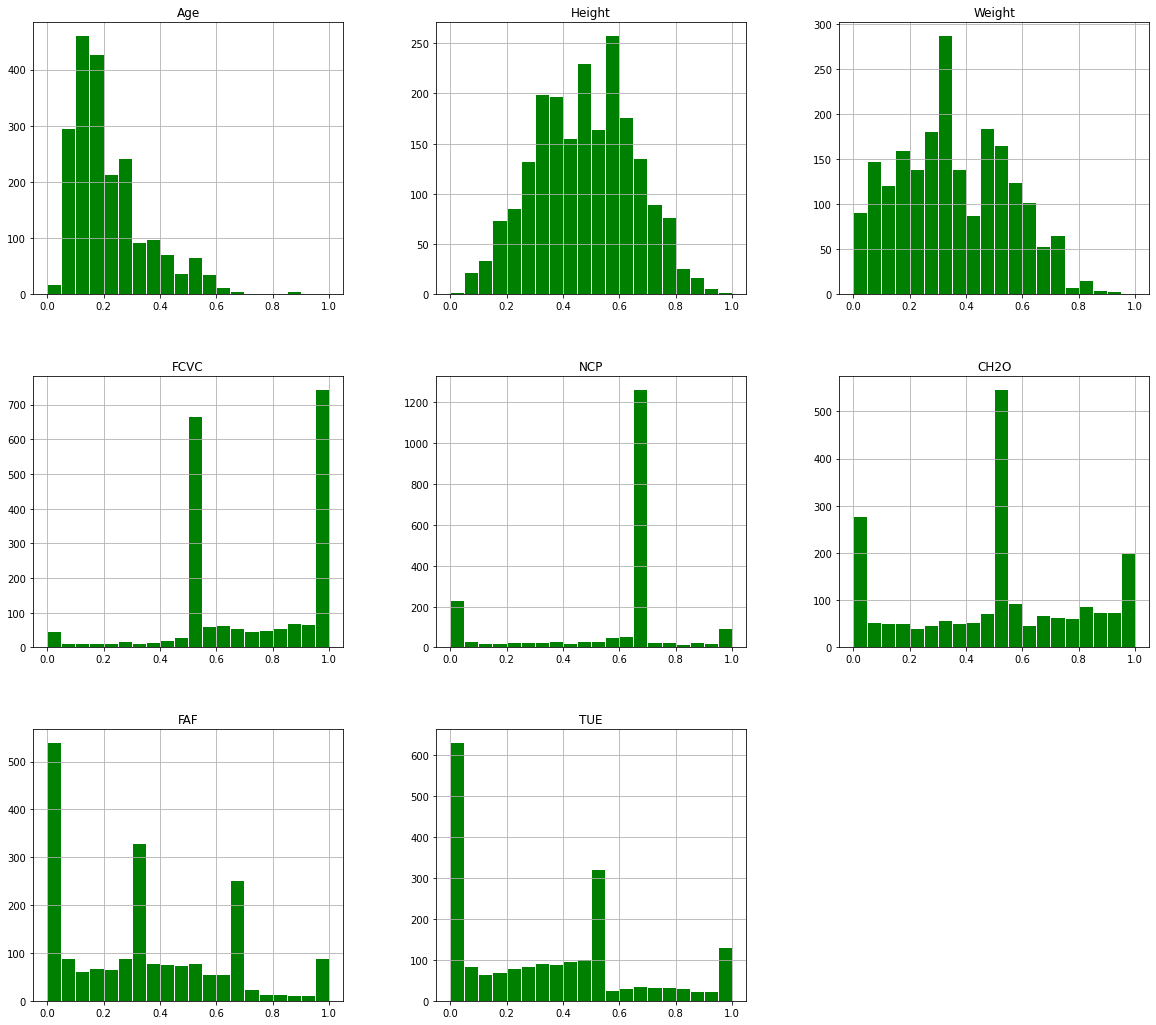

In [ ]:
#To Visualise using Histogram
Obese.hist(bins = 20, figsize = (20, 18), color = 'green', edgecolor = 'white');

In [ ]:
#TO count the values for each Obesity levels
c = Counter(Obese['OBESITY'])
print(c)

Counter({'Obesity_Type_I': 351, 'Obesity_Type_III': 324, 'Obesity_Type_II': 297, 'Overweight_Level_II': 290, 'Normal_Weight': 282, 'Overweight_Level_I': 276, 'Insufficient_Weight': 267})


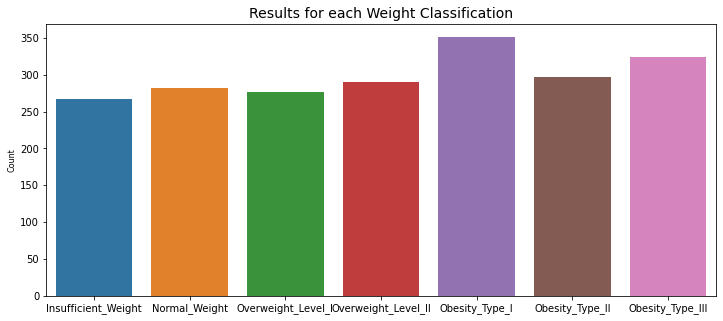

In [ ]:
name = Obese['OBESITY'].value_counts().index
num = Obese['OBESITY'].value_counts().values

fig = px.pie(data_frame=Obese,names=name,values=num
             ,title='Pie Chart to show OBESITY level Results',width=700,height=500)
fig.update_traces(textposition='inside',textinfo='label+percent')
fig.show()

plt.figure(figsize=(12,5))
sb.countplot(x='OBESITY',data=Obese,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=8)
plt.title('Results for each Weight Classification',fontsize=14)
plt.show()

In [ ]:
#count Obesity Level based on Gender
filt = Obese['Gender'] == 'Male'
c_m = Counter(Obese.loc[filt, 'OBESITY'])
print(c_m)
c_f = Counter(Obese.loc[~filt, 'OBESITY'])
print(c_f)

Counter({'Obesity_Type_II': 295, 'Obesity_Type_I': 195, 'Overweight_Level_II': 187, 'Normal_Weight': 145, 'Overweight_Level_I': 131, 'Insufficient_Weight': 98, 'Obesity_Type_III': 1})
Counter({'Obesity_Type_III': 323, 'Insufficient_Weight': 169, 'Obesity_Type_I': 156, 'Overweight_Level_I': 145, 'Normal_Weight': 137, 'Overweight_Level_II': 103, 'Obesity_Type_II': 2})


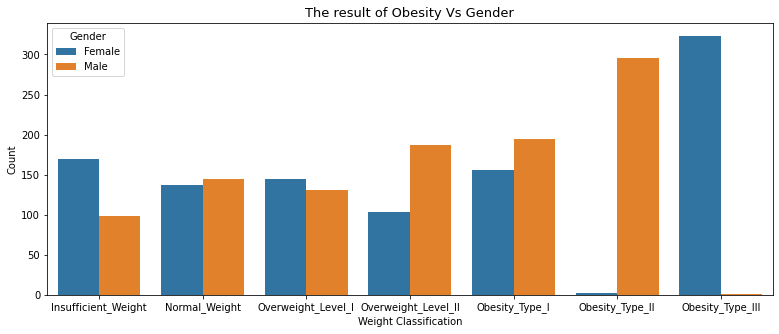

In [ ]:
plt.figure(figsize=(13,5))
sb.countplot(x='OBESITY',data=Obese,hue='Gender',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Count',fontsize=10)
plt.xlabel("Weight Classification")
plt.title('The result of Obesity Vs Gender',fontsize=13)
plt.show()

#When classified the obesity levels by gender found
# some of levels are super-imbalance (Obesity type II and Obesity type III)

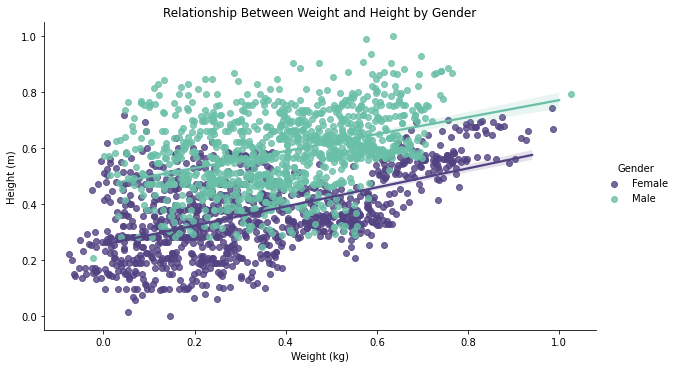

In [ ]:
#What is the relationship between weight and height
sb.lmplot(x="Weight", y="Height", hue="Gender", data=Obese,
          palette=dict(Female="#524282", Male="#69bfa7"), height=5, aspect=1.7, x_jitter=.1)
plt.title('Relationship Between Weight and Height by Gender')
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.show()

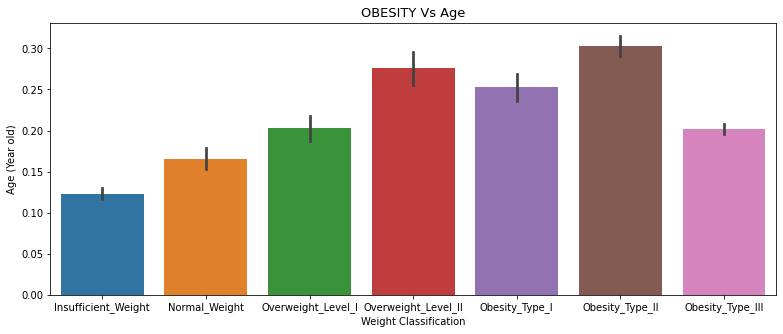

In [ ]:
plt.figure(figsize=(13,5))
sb.barplot(x='OBESITY',y='Age',data=Obese,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('OBESITY Vs Age',fontsize=13)
plt.ylabel('Age (Year old)',fontsize=10)
plt.xlabel('Weight Classification')
plt.show()


#Insufficient weight are in the young age (19-21)
#The obesity level increasing follow by age except Obesity type III

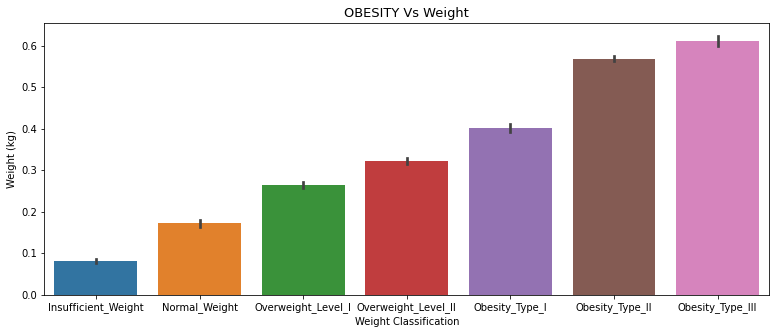

In [ ]:
plt.figure(figsize=(13,5))
sb.barplot(x='OBESITY',y='Weight',data=Obese,
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel('Weight Classification')
plt.ylabel('Weight (kg)',fontsize=10)
plt.title('OBESITY Vs Weight',fontsize=13)
plt.show()

#this Make sense

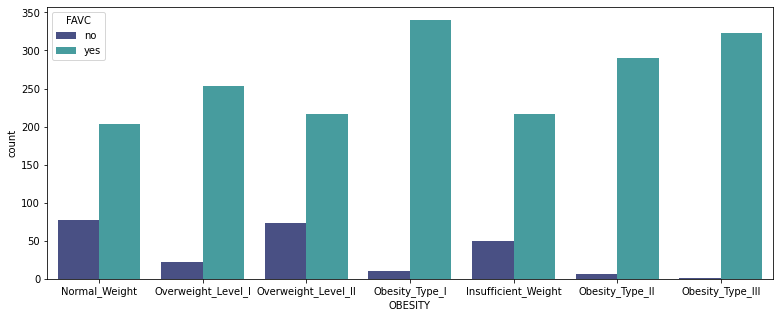

In [ ]:
#  eating high caloric food frequently?
plt.figure(figsize=(13,5))
sb.countplot(x='OBESITY', hue='FAVC', data=Obese, palette='mako')

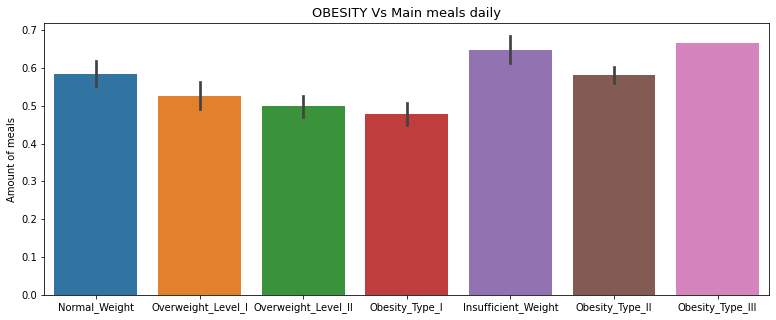

In [ ]:
# How many main meals daily?
plt.figure(figsize=(13,5))
sb.barplot(x='OBESITY',y='NCP',data=Obese,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Amount of meals',fontsize=10)
plt.title('OBESITY Vs Main meals daily',fontsize=13)
plt.show()

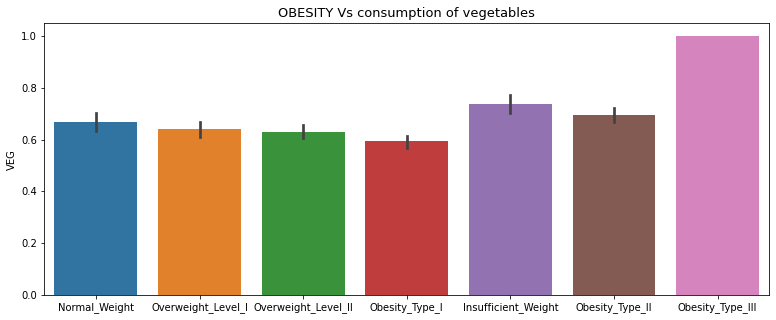

In [ ]:
# consumption of vegetables

plt.figure(figsize=(13,5))
sb.barplot(x='OBESITY',y='FCVC',data=Obese,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('VEG',fontsize=10)
plt.title('OBESITY Vs consumption of vegetables',fontsize=13)
plt.show()

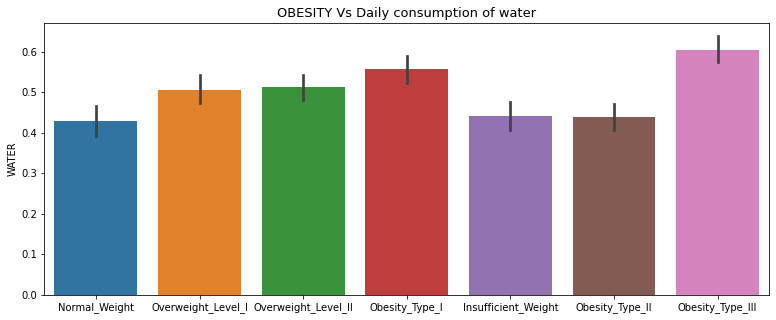

In [ ]:
# Daily consumption of water
plt.figure(figsize=(13,5))
sb.barplot(x='OBESITY',y='CH2O',data=Obese,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('WATER',fontsize=10)
plt.title('OBESITY Vs Daily consumption of water',fontsize=13)
plt.show()

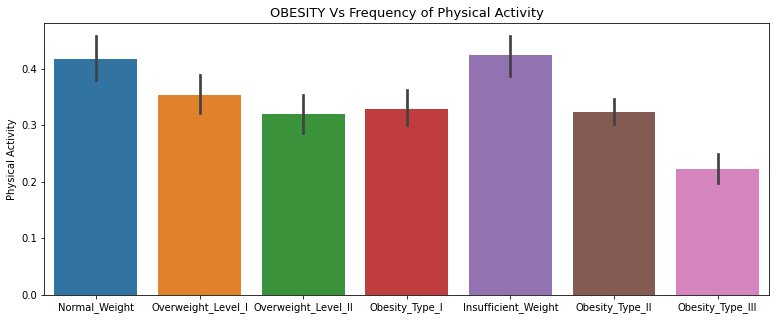

In [ ]:
#Frequency of Physical Activity
plt.figure(figsize=(13,5))
sb.barplot(x='OBESITY',y='FAF',data=Obese,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Physical Activity',fontsize=10)
plt.title('OBESITY Vs Frequency of Physical Activity',fontsize=13)
plt.show()

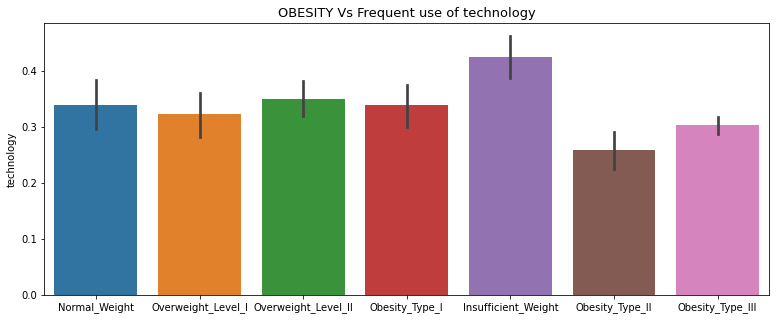

In [ ]:
# Frequent use of technology
plt.figure(figsize=(13,5))
sb.barplot(x='OBESITY',y='TUE',data=Obese,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('technology',fontsize=10)
plt.title('OBESITY Vs Frequent use of technology',fontsize=13)
plt.show()

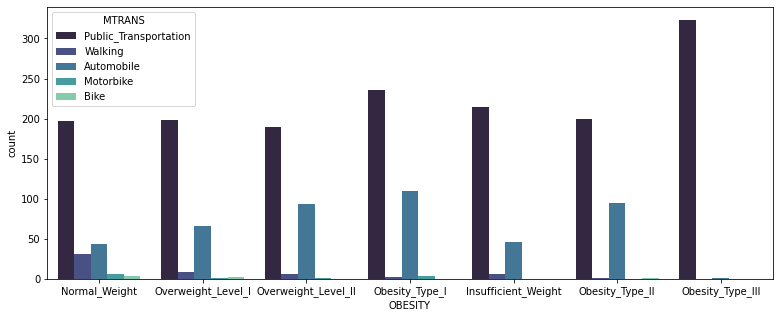

In [ ]:
#What is the means of Transport?
plt.figure(figsize=(13,5))
sb.countplot(x='OBESITY', hue='MTRANS', data=Obese, palette='mako')

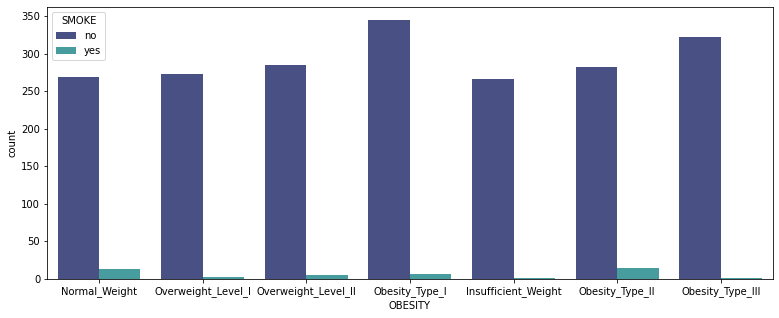

In [ ]:
#What is the frequecy of smoking?
plt.figure(figsize=(13,5))
sb.countplot(x='OBESITY', hue='SMOKE', data=Obese, palette='mako')

### INFERENTIAL STATISTICS

              Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age      1.000000 -0.031748  0.198160  0.013572 -0.055823 -0.044058 -0.148202   
Height  -0.031748  1.000000  0.457468 -0.040363  0.227806  0.220487  0.293584   
Weight   0.198160  0.457468  1.000000  0.216574  0.092149  0.203823 -0.056490   
FCVC     0.013572 -0.040363  0.216574  1.000000  0.034885  0.081332  0.022003   
NCP     -0.055823  0.227806  0.092149  0.034885  1.000000  0.075335  0.127816   
CH2O    -0.044058  0.220487  0.203823  0.081332  0.075335  1.000000  0.165310   
FAF     -0.148202  0.293584 -0.056490  0.022003  0.127816  0.165310  1.000000   
TUE     -0.302927  0.041808 -0.079351 -0.104128  0.015693  0.020704  0.058716   
OBESITY  0.279231  0.124863  0.912453  0.228591  0.011034  0.134170 -0.206001   

              TUE   OBESITY  
Age     -0.302927  0.279231  
Height   0.041808  0.124863  
Weight  -0.079351  0.912453  
FCVC    -0.104128  0.228591  
NCP      0.015693  0.011034  
CH2O     

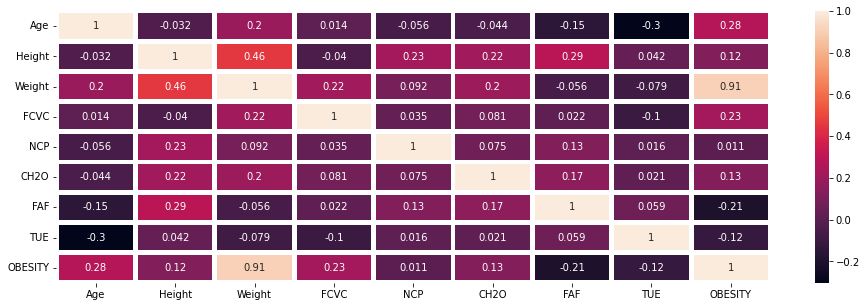

<Figure size 432x288 with 0 Axes>

In [ ]:
#Pearson Correlation
print(Obese.corr())
plt.figure(figsize=(16,5))
# plotting correlation heatmap
dataplot = sb.heatmap(Obese.corr(), annot=True, linewidths=4)

# displaying heatmap
plt.show()
plt.savefig('Correlation_HeatMap.png', bbox_inches='tight', pad_inches=0.0)

In [ ]:
#perform correlation
columnsCorrelating = []
columnsNotCorrelating = []
features = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
for c in features:
    rvalue, pvalue = pearsonr(Obese[c],Obese['OBESITY'])
    print('stat=%.3f, p=%.3f' %(rvalue,pvalue))

    #confidence level is 99%, alpha = 0.01
    alpha_half = 0.005
    if pvalue > 0.005:
        print('For correlation between '+c+' and OBESITY')
        print('Accept the null hypothesis: the conclusions are:')
        print('(i) correlation coefficient ,r value is equal to 0;')
        print('(ii) both variables are independent of each other;')
        print('(iii) both variables do not have any relationship;')
        columnsNotCorrelating.append(c)
    else:
        print('For correlation between '+c+' and OBESITY')
        print('Reject null hypothesis: the conclusions are:')
        print('(i) correlation coefficient ,r value is significantly different from 0;')
        print('(ii) both variables are dependent of each other;')
        print('(iii) both variables  have a relationship;')
        columnsCorrelating.append(c)
    print("\n")

stat=0.279, p=0.000
For correlation between Age and OBESITY
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii) both variables are dependent of each other;
(iii) both variables  have a relationship;


stat=0.125, p=0.000
For correlation between Height and OBESITY
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii) both variables are dependent of each other;
(iii) both variables  have a relationship;


stat=0.912, p=0.000
For correlation between Weight and OBESITY
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii) both variables are dependent of each other;
(iii) both variables  have a relationship;


stat=0.229, p=0.000
For correlation between FCVC and OBESITY
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii

<ipython-input-41-a5c3e9e12624>:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



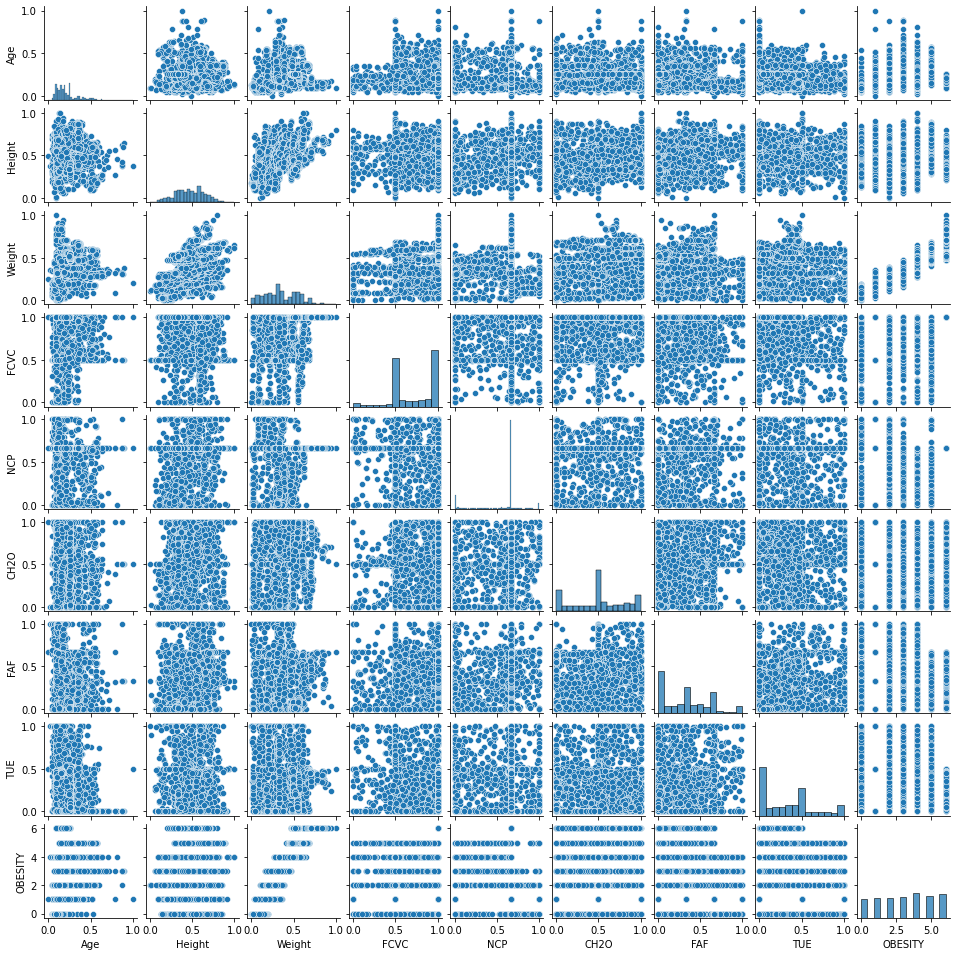

In [ ]:
#Scatter Plot for the quantitative variables
Obese_pairplot = Obese.dropna()
Obese_pairplot.to_Obese = pd.read_csv("/content/grive/MyDrive/Absola Data Science/DAV/DavAsignment/ObesityDataSet.csv")
sb.pairplot(Obese_pairplot, height=1.5)

In [ ]:
#From the correlation
#Age stat=0.279, p=0.000
#Height stat=0.125, p=0.000
#Weight stat=0.912, p=0.000
#FCVC stat=0.229, p=0.000
#NCP stat=0.011, p=0.614
#CH2O stat=0.134, p=0.000
#FAF stat=-0.206, p=0.000
#TUE stat=-0.115, p=0.000


#From the correlation eatures for which null hypothesis was rejected i.e p = 0 is selected
#Age
#Height
#Weight
#FCVC
#CH2O
#FAF
#TUE

#On the other hans the following features do not have any realtionship with OBESITY
#NCP

### DATA TRANSFORMATION

In [ ]:
# identity categorical variables (data type would be 'object')
cat = Obese.dtypes == object

print(cat)

# When dtype == object is 'true'
print(cat[cat])
cat_labels = cat[cat].index
print('Categorical variables:', cat_labels)

# When dtype == object is 'false'
false = cat[~cat]
non_cat = false.index
print('Non Categorical variables:', non_cat)

Gender                             True
Age                               False
Height                            False
Weight                            False
Family History with Overweight     True
FAVC                               True
FCVC                              False
NCP                               False
CAEC                               True
SMOKE                              True
CH2O                              False
SCC                                True
FAF                               False
TUE                               False
CALC                               True
MTRANS                             True
OBESITY                           False
dtype: bool
Gender                            True
Family History with Overweight    True
FAVC                              True
CAEC                              True
SMOKE                             True
SCC                               True
CALC                              True
MTRANS                            T

In [ ]:
# To check for how many labels each features has
for col in Obese.columns:
    print(col, ': ', len(Obese[col].unique()), 'labels')

Gender :  2 labels
Age :  1402 labels
Height :  1574 labels
Weight :  1525 labels
Family History with Overweight :  2 labels
FAVC :  2 labels
FCVC :  810 labels
NCP :  635 labels
CAEC :  4 labels
SMOKE :  2 labels
CH2O :  1268 labels
SCC :  2 labels
FAF :  1190 labels
TUE :  1129 labels
CALC :  4 labels
MTRANS :  5 labels
OBESITY :  7 labels


In [ ]:
# Do categorical transforms on all data
# One-Hot Encoding: used for nominal categorical variables. That is, variables that have no ordering among themselves.

Obese_ohe = Obese.copy()
one_hot_enc = OneHotEncoder(cols=['Gender', 'Family History with Overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS'])
Obese_ohe = one_hot_enc.fit_transform(Obese_ohe)
Obese_ohe

,Gender_1,Gender_2,Age,Height,Weight,Family History with Overweight_1,Family History with Overweight_2,FAVC_1,FAVC_2,FCVC,...,SCC_2,FAF,TUE,CALC,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5,OBESITY
0,1,0,0.148936,0.320755,0.186567,1,0,1,0,0.5,...,0,0.000000,0.500000,no,1,0,0,0,0,1
1,1,0,0.148936,0.132075,0.126866,1,0,1,0,1.0,...,1,1.000000,0.000000,Sometimes,1,0,0,0,0,1
2,0,1,0.191489,0.660377,0.283582,1,0,1,0,0.5,...,0,0.666667,0.500000,Frequently,1,0,0,0,0,1
3,0,1,0.276596,0.660377,0.358209,0,1,1,0,1.0,...,0,0.666667,0.000000,Frequently,0,1,0,0,0,2
4,0,1,0.170213,0.622642,0.379104,0,1,1,0,0.5,...,0,0.000000,0.000000,Sometimes,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0,0.148443,0.491943,0.689616,1,0,0,1,1.0,...,0,0.558756,0.453124,Sometimes,1,0,0,0,0,6
2107,1,0,0.169850,0.563366,0.707037,1,0,0,1,1.0,...,0,0.447130,0.299635,Sometimes,1,0,0,0,0,6
2108,1,0,0.181362,0.570200,0.706637,1,0,0,1,1.0,...,0,0.471403,0.323144,Sometimes,1,0,0,0,0,6
2109,1,0,0.220467,0.546132,0.704079,1,0,0,1,1.0,...,0,0.379702,0.293017,Sometimes,1,0,0,0,0,6


In [ ]:
Obese_ohe.select_dtypes(include='object').describe()

,CAEC,CALC
count,2087,2087
unique,4,4
top,Sometimes,Sometimes
freq,1761,1380


In [ ]:
ord_enc = OrdinalEncoder(mapping=
[{'col': 'CAEC', 'mapping': {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}},
{'col': 'CALC', 'mapping': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}},
])


In [ ]:
Obese_ord_enc = ord_enc.fit_transform(Obese_ohe)
Obese_ord_enc

,Gender_1,Gender_2,Age,Height,Weight,Family History with Overweight_1,Family History with Overweight_2,FAVC_1,FAVC_2,FCVC,...,SCC_2,FAF,TUE,CALC,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5,OBESITY
0,1,0,0.148936,0.320755,0.186567,1,0,1,0,0.5,...,0,0.000000,0.500000,0,1,0,0,0,0,1
1,1,0,0.148936,0.132075,0.126866,1,0,1,0,1.0,...,1,1.000000,0.000000,1,1,0,0,0,0,1
2,0,1,0.191489,0.660377,0.283582,1,0,1,0,0.5,...,0,0.666667,0.500000,2,1,0,0,0,0,1
3,0,1,0.276596,0.660377,0.358209,0,1,1,0,1.0,...,0,0.666667,0.000000,2,0,1,0,0,0,2
4,0,1,0.170213,0.622642,0.379104,0,1,1,0,0.5,...,0,0.000000,0.000000,1,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0,0.148443,0.491943,0.689616,1,0,0,1,1.0,...,0,0.558756,0.453124,1,1,0,0,0,0,6
2107,1,0,0.169850,0.563366,0.707037,1,0,0,1,1.0,...,0,0.447130,0.299635,1,1,0,0,0,0,6
2108,1,0,0.181362,0.570200,0.706637,1,0,0,1,1.0,...,0,0.471403,0.323144,1,1,0,0,0,0,6
2109,1,0,0.220467,0.546132,0.704079,1,0,0,1,1.0,...,0,0.379702,0.293017,1,1,0,0,0,0,6


In [ ]:
#Categorical variables are one-hot encoded with get_dummies()

obesity_lab = Obese[["OBESITY"]]

In [ ]:
#numeric features, one-hot encoded ones, and labels are concatenated in a new DataFrame. It has 32 columns now.
obesity_numeric = Obese[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]
obesity_dummies = pd.get_dummies(Obese[["Gender", "Family History with Overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)

In [ ]:
obesity_concatenated.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,OBESITY
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5,1,0,...,0,0,0,1,0,0,0,1,0,1
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0,1,0,...,0,0,1,0,0,0,0,1,0,1
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5,0,1,...,0,1,0,0,0,0,0,1,0,1
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0,0,1,...,0,1,0,0,0,0,0,0,1,2
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0,0,1,...,0,0,1,0,0,0,0,1,0,3


In [ ]:
obesity_label = obesity_concatenated["OBESITY"]
obesity_features = obesity_concatenated.drop("OBESITY", axis = 1)

In [ ]:
obesity_features = obesity_features.astype("float")

In [ ]:
Obese.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
Family History with Overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
OBESITY                             int64
dtype: object

In [ ]:
#Encode the Obesity levels with numeric value
Obese['OBESITY'] = Obese['OBESITY'].map({'Normal_Weight' : 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Insufficient_Weight': 0, \
 'Obesity_Type_I' : 4  , 'Obesity_Type_II' : 5, \
 'Obesity_Type_III' : 6 })

<ipython-input-38-744920882e9e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### MACHINE LEARNING MODEL

In [ ]:
#Creating new dataframe
Obese_prep = Obese.copy()

# create dummy variables
Obese_prep = pd.get_dummies(Obese_prep,columns=["Gender","Family History with Overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
Obese_prep.head()



,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,OBESITY,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5,1,1,...,0,0,0,0,1,0,0,0,1,0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0,1,1,...,1,0,0,1,0,0,0,0,1,0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0,2,0,...,0,0,1,0,0,0,0,0,0,1
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0,3,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# split dataset in features and target variable

# Features
X = Obese_prep.drop(columns=["OBESITY"])

# Target variable
y = Obese_prep['OBESITY']

**Build Neural Networks for Classification Model Using MLP**

OBESITY Levels are:  ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
The predict y value is that is the Obesity Level  [6]


Confusion Matrix is 
[[85  1  0  0  0  0  0]
 [ 8 81  7  0  0  0  0]
 [ 0  0 83  4  0  0  0]
 [ 0  0  3 67  0  0  0]
 [ 0  0  0  1 96  2  0]
 [ 0  0  0  0  2 84 10]
 [ 0  0  0  0  0  0 93]]


              precision    recall  f1-score   support

           0       0.91      0.99      0.95        86
           1       0.99      0.84      0.91        96
           2       0.89      0.95      0.92        87
           3       0.93      0.96      0.94        70
           4       0.98      0.97      0.97        99
           5       0.98      0.88      0.92        96
           6       0.90      1.00      0.95        93

    accuracy                           0.94       627
   macro avg       0.94      0.94      0.94       627
weighted avg       0.94      0.94      0.94   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



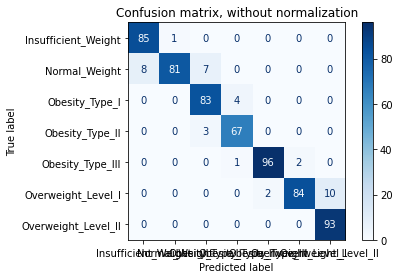

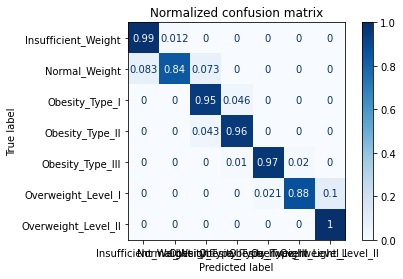

In [ ]:
# x refers to all columns that have correlated from the correlation test
#Build the model
#Fit the model
#Evaluate the model using confusion matrix
X = Obese[['Age','Height','Weight','FCVC', 'CH2O','FAF','TUE']]
y = Obese['OBESITY']

#My classes arethe Obesity levels
class_names = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I','Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
 'Overweight_Level_II']

print("OBESITY Levels are: ", class_names)

#Train, test and split the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create an MLP model with 4 hidden layers with varying number of perceptrons in each #layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)


#fit the model
classifier = mlp.fit(X_train,y_train)

#Prediction
y_pred = mlp.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The #order of the values are
#aligned to the order of the columns
new_input = [[5, 7, 9, 11, 13, 15,10]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the Obesity Level ", new_y)
print("\n")

#Model Evaluation
#https://scikit-learn.org/stable/modules/model_evaluation.html#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

print("=======================================================")
print(len(mlp.coefs_))
print(mlp.coefs_)
print("\n")
print("=======================================================")
print(len(mlp.intercepts_))
print(mlp.intercepts_)
print("\n")
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)



**Using Various classification model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

# program to run multilple models though sklearn
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):

    models = [
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]

    for name, model in models:
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)

        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)

        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)

        # output
        print(name + ':')
        print("---------------------------------------------------------------")
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
            print("                            -----------------------------------               \n")
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))
            print("                            -----------------------------------               \n")
        else:
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))
            print("                            -----------------------------------               \n")

In [ ]:
#run Decision Trees, Random Forest, KNN and SVM
run_models(X_train, y_train, X_test, y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.9378
Accuracy w/Scaled Data (ss): 0.93939
Accuracy w/Scaled Data (mm): 0.93939

Classification Report (mm):
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        86
           1       0.82      0.90      0.86        96
           2       0.87      0.85      0.86        87
           3       0.93      0.90      0.91        70
           4       0.99      0.97      0.98        99
           5       1.00      0.99      0.99        96
           6       1.00      1.00      1.00        93

    accuracy                           0.94       627
   macro avg       0.94      0.94      0.94       627
weighted avg       0.94      0.94      0.94       627

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.91228
Accuracy w/Scaled Data (ss

### USING DECISION TREE

In [ ]:
#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
#Using classifier and confusion matrix evaluation
feature_cols = ['Age','Height','Weight','FCVC','CH2O','FAF','TUE']
X = Obese[feature_cols] # Features
Y = Obese['OBESITY'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


#Build Decision Tree Model using Scikit Learn
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Evaluate the accuracy of the model (or classifier) for prediction
# Model Accuracy, how often is the classifier correct?
print("\n")
print("Accuracy for 70% training set and 30% test set :",
          metrics.accuracy_score(y_test, y_pred))


#Confusion matrix
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")

cm = confusion_matrix(y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]

print("true negative: ", tn)
print("false negative: ", fn)
print("true positive: ", tp)
print("false positive: ", fp)




Accuracy for 70% training set and 30% test set : 0.9154704944178629


[[85  6  0  0  0  0  0]
 [ 8 72 10  0  0  0  0]
 [ 0 10 69  4  0  0  0]
 [ 0  0  5 76  4  0  0]
 [ 0  0  0  0 92  3  2]
 [ 0  0  0  1  0 94  0]
 [ 0  0  0  0  0  0 86]]


true negative:  85
false negative:  8
true positive:  72
false positive:  6


In [ ]:
#Evaluating using classifier, the descision tree shows an accuracy of 92%
#Now evaluate using a confusion matrix
#using confusion matrix there is a greater number of true negative and true positive , clearly showing the model is great.
#visualizing the decision tree in the next cell

|--- feature_2 <= 0.45
|   |--- feature_2 <= 0.16
|   |   |--- feature_1 <= 0.40
|   |   |   |--- feature_2 <= 0.06
|   |   |   |   |--- feature_1 <= 0.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.12
|   |   |   |   |   |--- feature_0 <= 0.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  0.05
|   |   |   |   |   |   |--- feature_0 <= 0.42
|   |   |   |   |   |   |   |--- feature_0 <= 0.22
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.04
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  0.04
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.31
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_6 >  0.31
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  0.22
|   |   |   |   |   |   |   |   |--- feature_5 <= 0.24
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   

[Text(0.6020798841059603, 0.9642857142857143, '1 <= 0.452\ngini = 0.856\nsamples = 2087\nvalue = [267, 282, 276, 290, 351, 297, 324]\nclass = Obesity_Type_III'),
 Text(0.30846440397350994, 0.8928571428571429, '1 <= 0.157\ngini = 0.801\nsamples = 1358\nvalue = [267, 282, 276, 285, 243, 5, 0]\nclass = Obesity_Type_II'),
 Text(0.1287251655629139, 0.8214285714285714, '1 <= 0.397\ngini = 0.483\nsamples = 412\nvalue = [261, 140, 10, 1, 0, 0, 0]\nclass = Insufficient_Weight'),
 Text(0.052980132450331126, 0.75, '1 <= 0.058\ngini = 0.537\nsamples = 216\nvalue = [87, 118, 10, 1, 0, 0, 0]\nclass = Normal_Weight'),
 Text(0.019867549668874173, 0.6785714285714286, '1 <= 0.123\ngini = 0.165\nsamples = 88\nvalue = [80, 8, 0, 0, 0, 0, 0]\nclass = Insufficient_Weight'),
 Text(0.013245033112582781, 0.6071428571428571, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0, 0, 0, 0]\nclass = Normal_Weight'),
 Text(0.026490066225165563, 0.6071428571428571, '1 <= 0.053\ngini = 0.091\nsamples = 84\nvalue = [80, 4, 0,

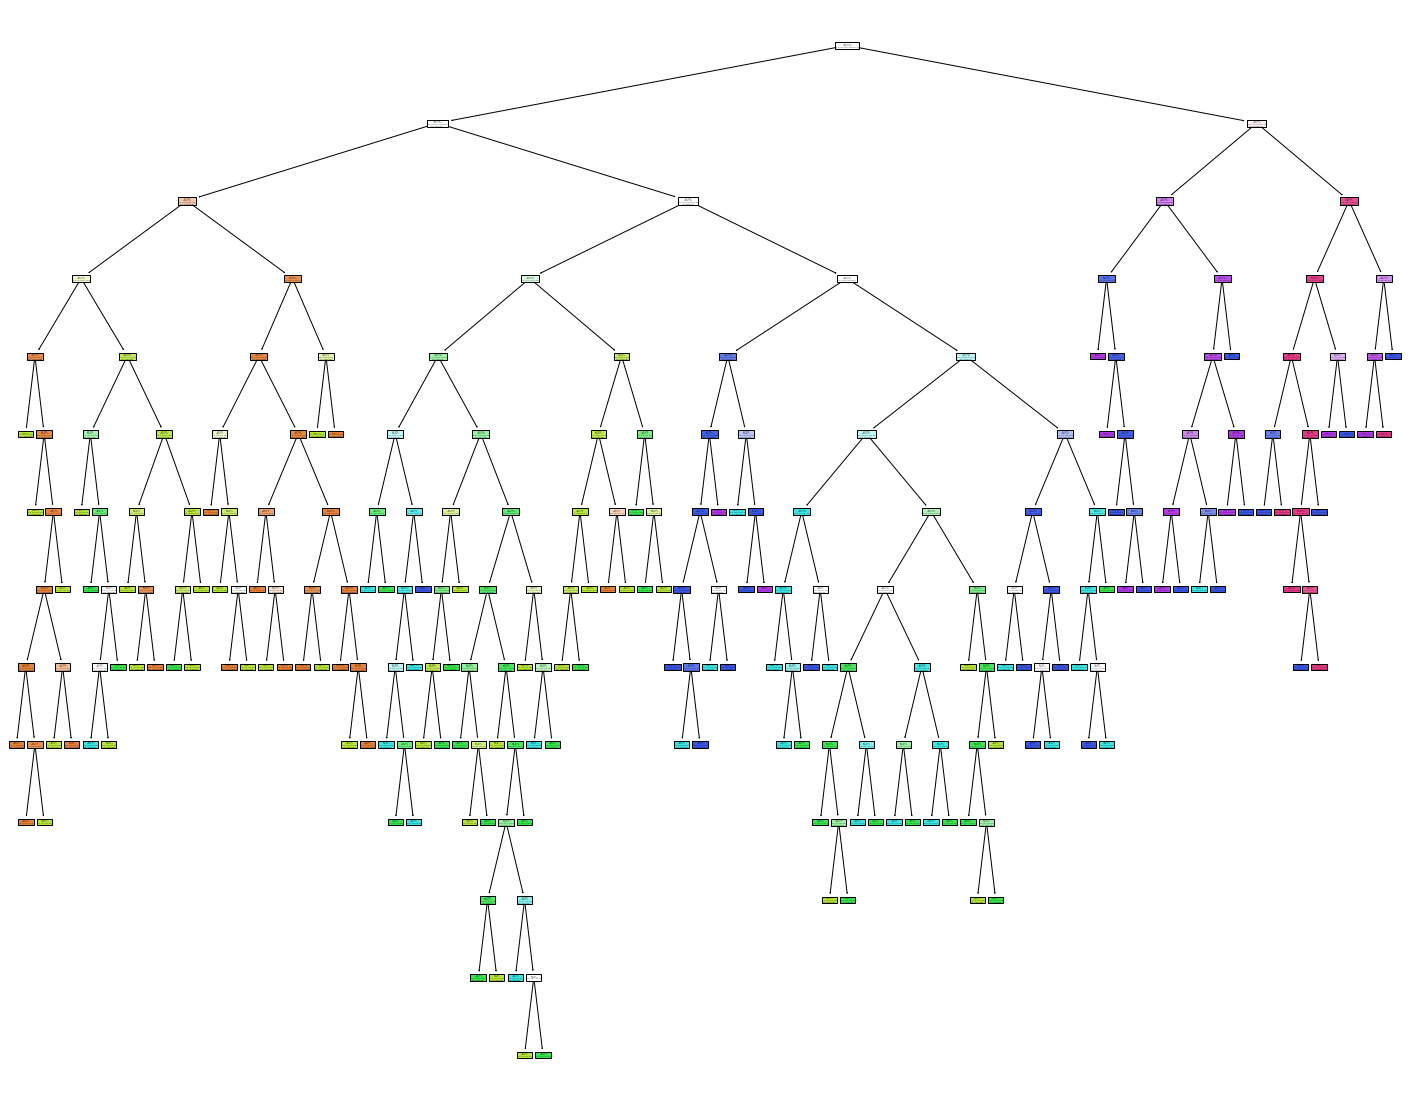

In [ ]:
feature_cols = ['Age','Height','Weight','FCVC','CH2O','FAF','TUE']
X = Obese[feature_cols] # Features
y = Obese['OBESITY'] # Target variable

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,
                   feature_names= Obese['OBESITY'],
                   class_names=['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II'],
                   filled=True)


### USING MLP REGRESSION PREDICTIVE MODEL

In [ ]:
#Fit the model
#Evaluate the model using root mean square error

X = Obese[['Age','Height','Weight','FCVC','CH2O','FAF','TUE']]

#My refers to my actual quantitaive Obesity column which contains numeric data
y = Obese['OBESITY']

#Train, test and split the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Build and fit the Neural Network MLP Regression Model

nn = MLPRegressor(hidden_layer_sizes=(4), activation='relu', max_iter = 1000, solver='lbfgs')
nn_model = nn.fit(X_train, y_train)

#Use the NN model to predict the target values
#Prediction
y_pred = nn_model.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
new_input = [[5, 7, 9, 11, 13, 15, 10,]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the Obesity Level ", new_y)
print("\n")


#Evaluation of the model
#https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
print("The mean squared error of the model is ", mean_squared_error(y_test, y_pred))
print("The mean absolute error of the model is ", mean_absolute_error(y_test, y_pred))
print("The R squared value of the model is ", r2_score(y_test, y_pred))
print("\n")


#Plot the scatterplots for x_test, y_test and y_pred values
#Cannot plot because the there are 10 predictors]]

#My refers to my actual quantitaive Obesity Data column which contains numeric data
y = Obese['OBESITY']

#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Build and fit the Neural Network MLP Regression Model
#Detailed explanation for all the parameters are here:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
nn = MLPRegressor(hidden_layer_sizes=(4), activation='relu', max_iter = 2000, solver='lbfgs')
nn_model = nn.fit(X_train, y_train)

#Use the NN model to predict the target values
#Prediction
y_pred = nn_model.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
new_input = [[5, 7, 9, 11, 13, 6, 15]]
new_y = mlp.predict(new_input)
print("The predict y value is that is the Obesity Level ", new_y)
print("\n")


#Evaluation of the model
#https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
print("The mean squared error of the model is ", mean_squared_error(y_test, y_pred))
print("The mean absolute error of the model is ", mean_absolute_error(y_test, y_pred))
print("The R squared value of the model is ", r2_score(y_test, y_pred))
print("\n")


#Plot the scatterplots for x_test, y_test and y_pred values
#Cannot plot because the there are 10 predictors

The predict y value is that is the Obesity Level  [6]


The mean squared error of the model is  0.10805195189320216
The mean absolute error of the model is  0.24381563787305885
The R squared value of the model is  0.9735694036609643


The predict y value is that is the Obesity Level  [6]


The mean squared error of the model is  0.08306970566194005
The mean absolute error of the model is  0.22584403355728727
The R squared value of the model is  0.9801005333935942




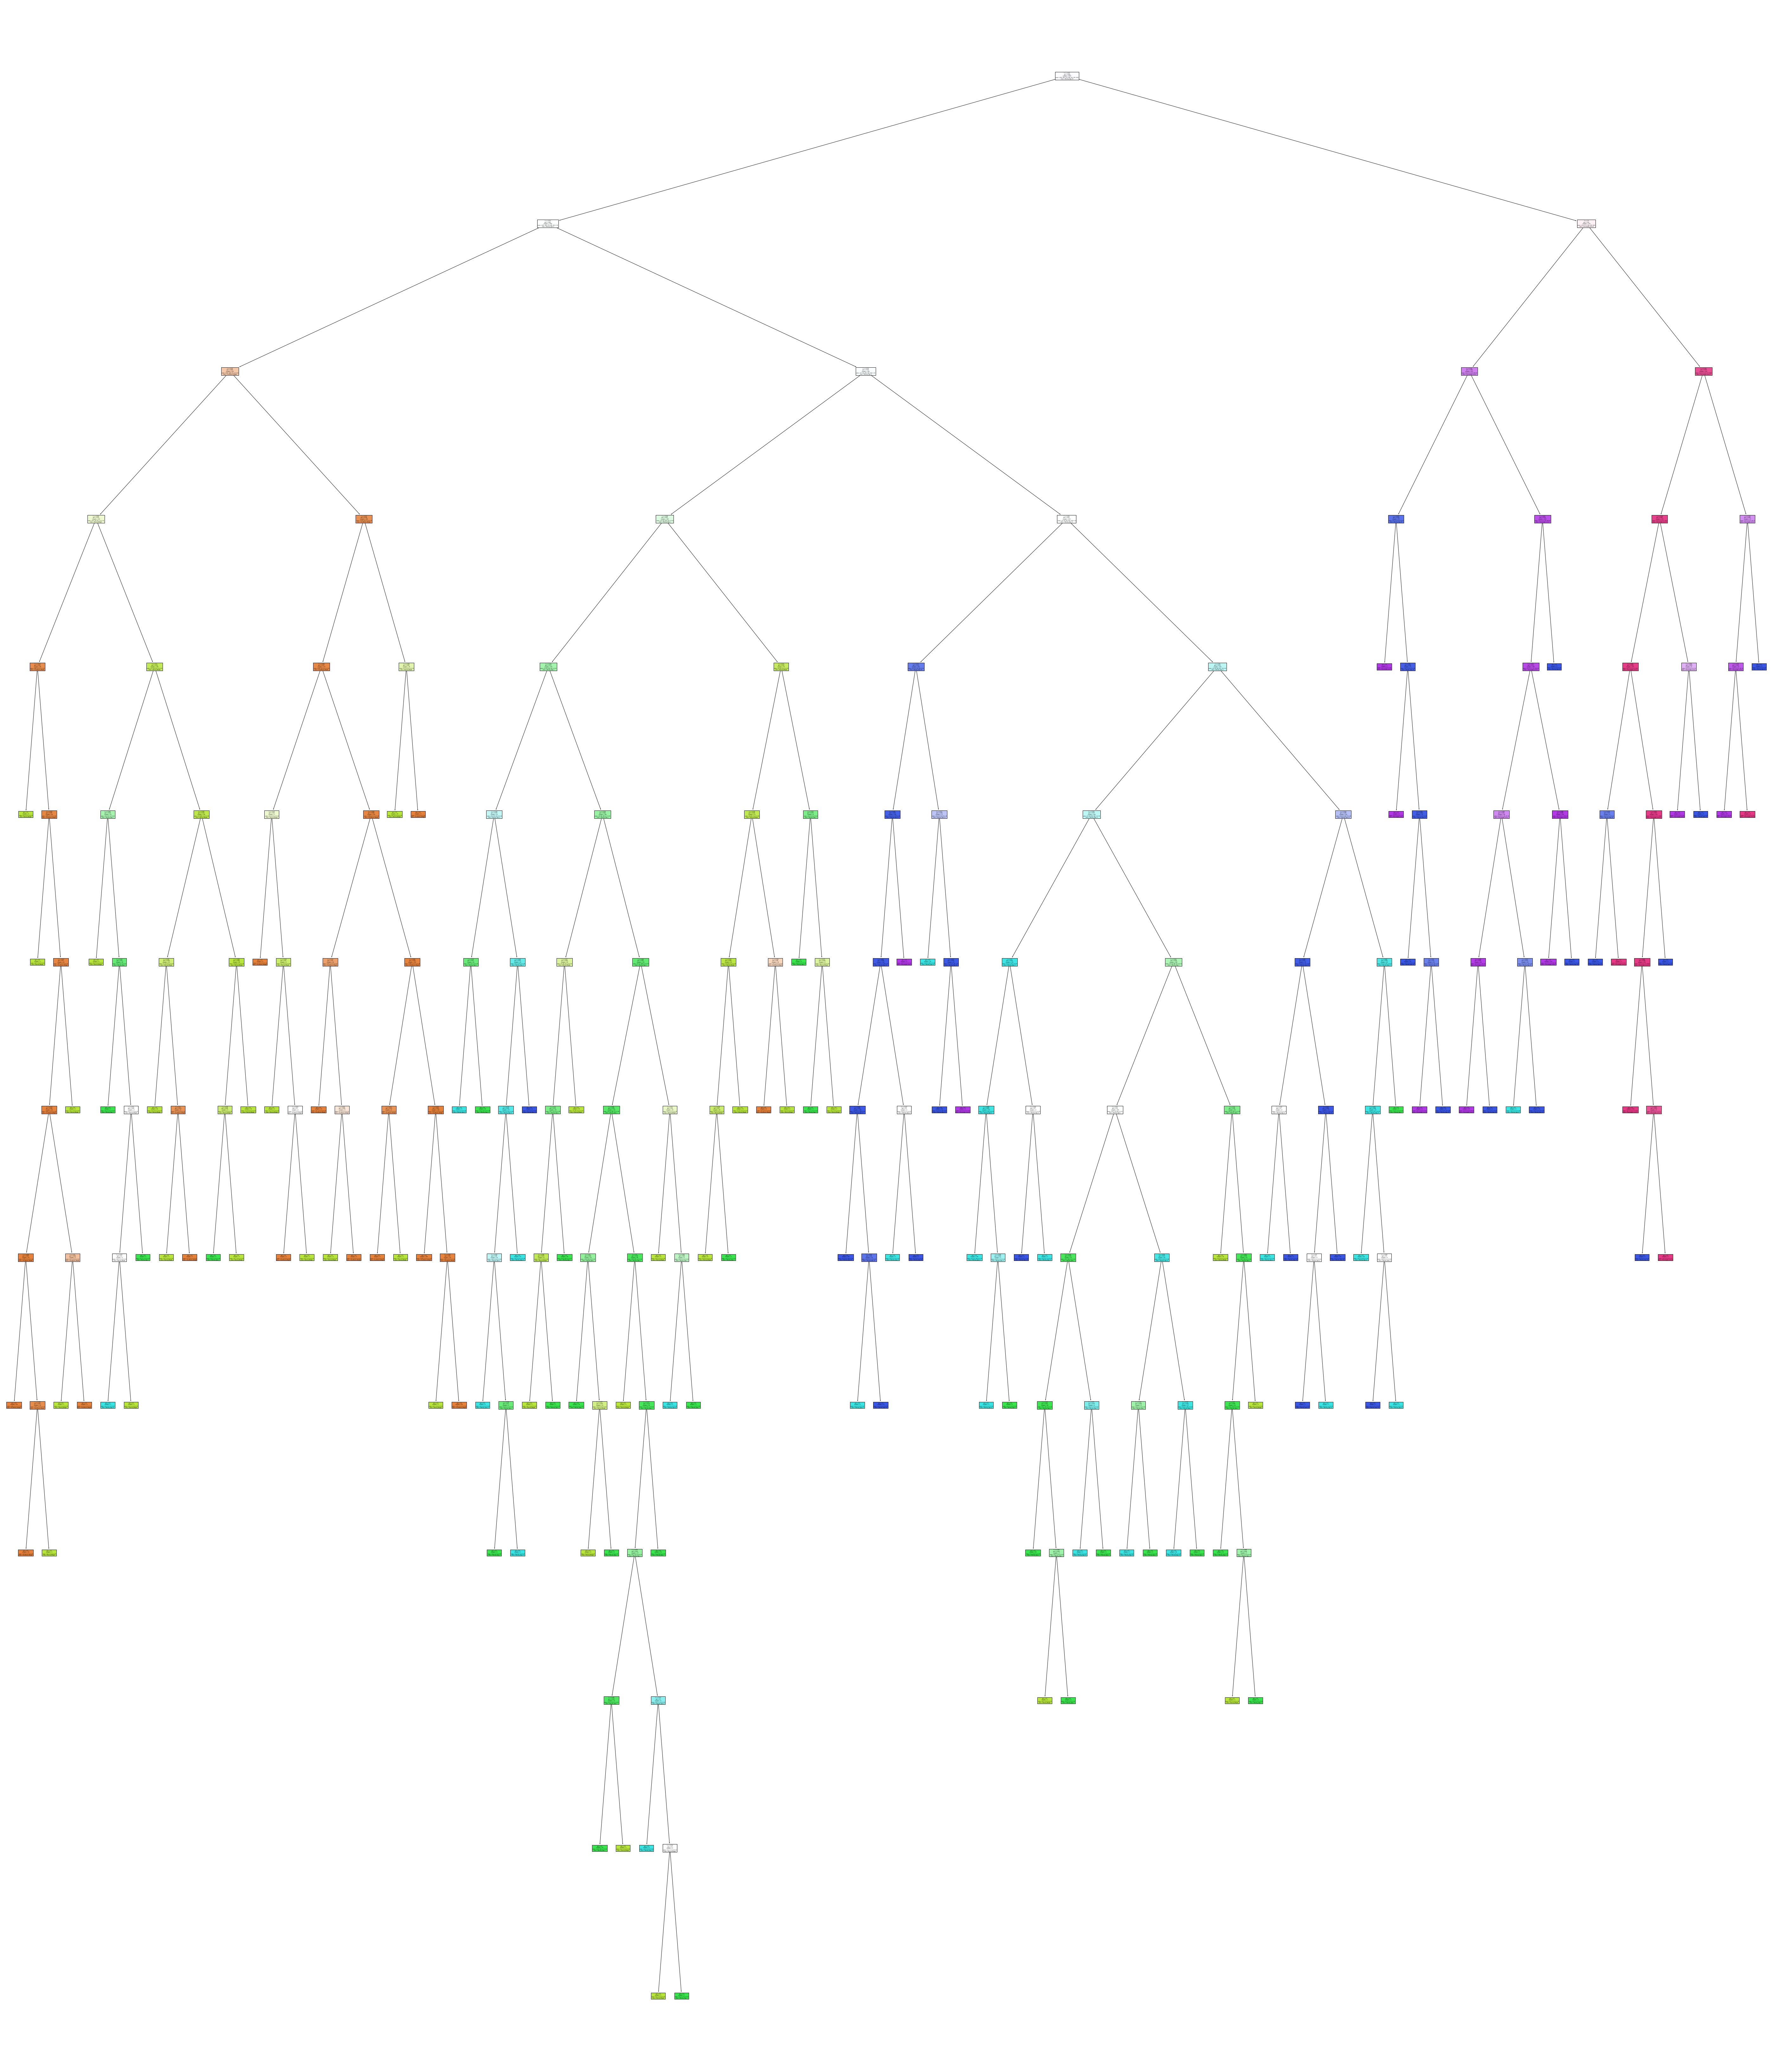

In [ ]:
#Display Of the decision tree
fig = plt.figure(figsize=(100,120))
_ = tree.plot_tree(clf,
                   feature_names=Obese['OBESITY'],
                   class_names=['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II'],
                   filled=True)
fig.savefig("decision_tree.png")

### Decision Tree For Regression

[4.         6.         0.33333333 ... 1.82352941 5.         4.        ]


The root mean square error is:  0.7729586617534924


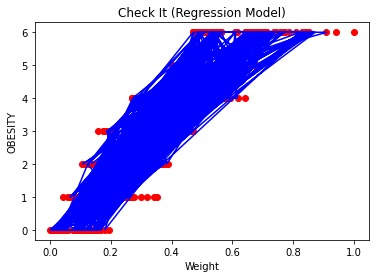

In [ ]:
# using the most correlated feature Weight with coefficient of 0.91
X = Obese['Weight'] # Features
y = Obese['OBESITY']
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

#Fit x_train and y-train into the regression model
#fitting the decision tree regression model to the dataset without splitting the dataset
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

#Obtain predicted y values (i.e. insulin) based on x test values
y_pred = regressor.predict(x_test)
print(y_pred)

#Model evaluation
#we evaluate our model by finding the root mean squared error produced by the model.
#use numpy np.sqrt
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("\n")
print("The root mean square error is: ", rmse)

#Visualising the Decision Tree Regression results based on x_train and y_train
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Weight')
plt.ylabel('OBESITY')
plt.show()


In [ ]:
# From the above code the root mean square error is 0.77 which is Ok

        Weight
1994  0.706437
1293  0.325582
26    0.194030
1652  0.553988
1135  0.178316
...        ...
1104  0.295801
1551  0.517225
1907  0.727736
1913  0.541706
1400  0.336826

[1669 rows x 1 columns]


      OBESITY
1994        6
1293        4
26          1
1652        5
1135        3
...       ...
1104        3
1551        5
1907        6
1913        6
1400        4

[1669 rows x 1 columns]


        Weight
1840  0.707854
471   0.328358
1950  0.844904
1424  0.446195
700   0.155831
...        ...
929   0.268657
859   0.268657
66    0.380597
139   0.216418
971   0.363105

[418 rows x 1 columns]


Coefficients: 
 [[9.3246353]]


Mean squared error:  0.6964828879195403
Coefficient of determination:  0.8212678653756789


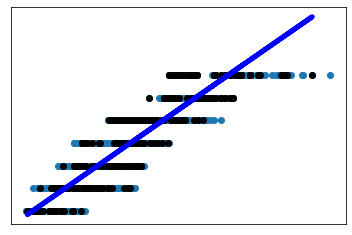

In [ ]:
#Use only 1 feature - Weight of individual to predict the Obesity level
x = Obese[['Weight']]
y = Obese[['OBESITY']]

#The scatterplot evidence that seemingly there is a trend
plt.scatter(x, y)

#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)
#Create linear regression object
regr = LinearRegression()

# Train the model using the training sets and reshape 1D arrays
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

print("\n")

print('Coefficients: \n', regr.coef_)
print("\n")

# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))

 # Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=5)
plt.xticks(())
plt.yticks(())

plt.show()



### Regression

        Weight
2002  0.708235
1114  0.341592
740   0.022388
674   0.021898
1383  0.311390
...        ...
579   0.152306
1613  0.604478
1973  0.846059
540   0.080171
1057  0.353133

[1669 rows x 1 columns]


      OBESITY
2002        6
1114        3
740         0
674         0
1383        4
...       ...
579         0
1613        5
1973        6
540         0
1057        3

[1669 rows x 1 columns]


        Weight
340   0.246269
1886  0.544137
1786  0.592807
1532  0.619589
1287  0.323989
...        ...
2055  0.529826
1142  0.312983
213   0.171642
376   0.156716
1365  0.337392

[418 rows x 1 columns]


Coefficients: 
 [[9.27436096]]


Mean squared error:  0.7605239820090339
Coefficient of determination:  0.8190609868007445


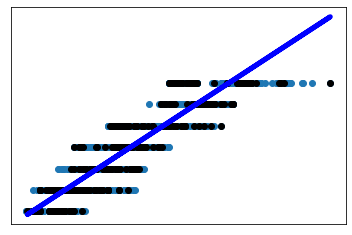

In [ ]:
#Use only 1 feature - Weight to predict the target Obesity Level(Y)
x = Obese[['Weight']]
y = Obese[['OBESITY']]

#The scatterplot evidence that seemingly there is a trend
plt.scatter(x, y)

#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)
#Create linear regression object
regr = LinearRegression()

# Train the model using the training sets and reshape 1D arrays
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

print("\n")

print('Coefficients: \n', regr.coef_)
print("\n")

# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))

 # Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=5)
plt.xticks(())
plt.yticks(())

plt.show()




### MULTIPLE LINEAR REGRESSION PLOT AND THE PREDICTION MODEL

#### Ordinary Least Squares regression (OLS)

In [ ]:
# OLS to describe the relationship between one or more independent quantitative variables and a dependent variable
feature_cols = ['Age','Height','Weight','FCVC','CH2O','FAF','TUE']
X = Obese[feature_cols] # Features
y = Obese[['OBESITY']]

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                OBESITY   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     5123.
Date:                Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:11:40   Log-Likelihood:                -1362.1
No. Observations:                2087   AIC:                             2740.
Df Residuals:                    2079   BIC:                             2785.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1495      0.049     23.246      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
#Example  Multiple Linear Regression Plot and the prediction model
feature_cols = ['Age','Height','Weight','FCVC','CH2O','FAF','TUE']
X = Obese[feature_cols] # Features
Y = Obese[['OBESITY']] # Target variable

#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(X, Y,test_size=0.2)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)

#Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")

# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))


#Use statsmodel for model summary
Obese_x =Obese['Weight']
Obese_y = Obese['OBESITY']
Obese_x = sm.add_constant(Obese_x)
model = sm.OLS(Obese_y, Obese_x).fit()
predictions = model.predict(Obese_x)
print_model = model.summary()
print(print_model)


           Age    Height    Weight      FCVC      CH2O       FAF       TUE
497   0.127660  0.207547  0.044776  0.500000  0.500000  0.333333  0.500000
1412  0.248867  0.688106  0.511639  0.960613  0.934719  0.060584  0.066762
122   0.148936  0.566038  0.082090  1.000000  0.000000  0.333333  0.000000
2016  0.254046  0.277006  0.472541  1.000000  0.000268  0.001980  0.283176
838   0.255319  0.556666  0.305970  0.608634  0.500000  0.666667  0.000000
...        ...       ...       ...       ...       ...       ...       ...
642   0.085106  0.507340  0.097450  0.475371  0.375861  0.067045  0.871660
136   0.234043  0.641509  0.246269  0.500000  0.500000  0.333333  0.500000
916   0.530912  0.223474  0.178023  0.501398  0.763388  0.090391  0.403035
1021  0.163259  0.094340  0.183973  0.500000  0.500000  0.091613  0.306951
228   0.553191  0.433962  0.305970  1.000000  1.000000  0.000000  0.000000

[1669 rows x 7 columns]


      OBESITY
497         1
1412        4
122         0
2016        6
838

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



### LOGISTICS REGRESSION

                     precision    recall  f1-score   support

Insufficient_Weight       0.66      0.97      0.79        74
      Normal_Weight       0.60      0.41      0.49        81
     Obesity_Type_I       0.66      0.29      0.40        73
    Obesity_Type_II       0.38      0.36      0.37        55
   Obesity_Type_III       0.61      0.79      0.69        78
 Overweight_Level_I       0.88      0.72      0.79        82
Overweight_Level_II       0.75      1.00      0.85        79

           accuracy                           0.66       522
          macro avg       0.65      0.65      0.63       522
       weighted avg       0.66      0.66      0.64       522



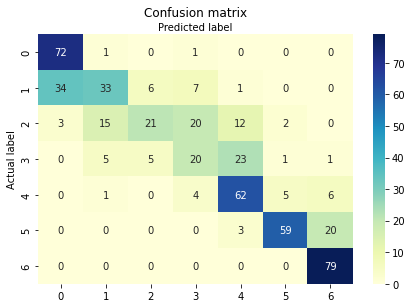

In [ ]:
feature_cols = ['Age','Height','Weight','FCVC','CH2O','FAF','TUE']
#split dataset in features and target variable
X = Obese[feature_cols] # Features
y = Obese['OBESITY'] # Target variable

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



from sklearn.metrics import classification_report
target_names = ['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']
print(classification_report(y_test, y_pred, target_names=target_names))



### CLUSTERING

           FAF       TUE
0     0.000000  0.500000
1     1.000000  0.000000
2     0.666667  0.500000
3     0.666667  0.000000
4     0.000000  0.000000
...        ...       ...
2106  0.558756  0.453124
2107  0.447130  0.299635
2108  0.471403  0.323144
2109  0.379702  0.293017
2110  0.342151  0.357069

[2087 rows x 2 columns]


0       1
1       1
2       1
3       2
4       3
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: OBESITY, Length: 2087, dtype: int64


[0 1 0 ... 0 1 0]


The kmeans labels are: 
[0 1 0 ... 0 1 0]


[[0.39288636 0.5986465 ]
 [0.28742534 0.08905074]]


0.006409523299868616


Center for cluster 0 is  [0.19572168 0.46093448]
Center for cluster 1 is  [0.026627   0.09148792]
Center for cluster 2 is  [0.7206322  0.05256518]
Center for cluster 3 is  [0.68137561 0.55717505]
Center for cluster 4 is  [0.3570465  0.05207126]
Center for cluster 5 is  [0.15701421 0.88639782]


The predicted cluster is 
[5]
The predicted cluster  is 
[3]
The predicted cluster 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



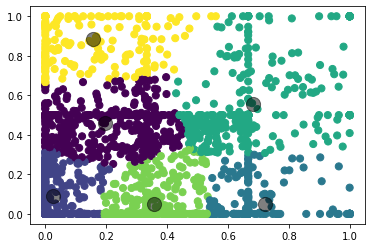

In [ ]:
#Select columns for X
X = Obese[['FAF', 'TUE']]

true_class = Obese['OBESITY']
print(X)
print("\n")
print(true_class)
print("\n")

#Perform Clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")

#Print off the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
#Note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")

#Evaluate Clustering Performance
#adjusted Rand index is a function that measures the similarity of the two assignments,
#ignoring permutations and with chance normalization
print(metrics.adjusted_rand_score(true_class, cluster_class))

print("\n")

#Plot the graphs
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X['FAF'], X['TUE'], c=y_kmeans, s=50, cmap='viridis')

#plot the centers
centers = kmeans.cluster_centers_
print("Center for cluster 0 is ", centers[0])
print("Center for cluster 1 is ", centers[1])
print("Center for cluster 2 is ", centers[2])
print("Center for cluster 3 is ", centers[3])
print("Center for cluster 4 is ", centers[4])
print("Center for cluster 5 is ", centers[5])
print("\n")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
#Challenge - plot the centers with labels (0-5)
#Resource https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python

#Prediction of cluster
input = [[20.0, 93.6]]
pred_cluster = kmeans.predict(input)
print("The predicted cluster is ")
print(pred_cluster)


input2 = [[65.0, 83.6]]
pred_cluster2 = kmeans.predict(input2)
print("The predicted cluster  is ")
print(pred_cluster2)

input3 = [[14.8, 110.0]]
pred_cluster3 = kmeans.predict(input3)
print("The predicted cluster  is ")
print(pred_cluster3)




           FAF    Weight
0     0.000000  0.186567
1     1.000000  0.126866
2     0.666667  0.283582
3     0.666667  0.358209
4     0.000000  0.379104
...        ...       ...
2106  0.558756  0.689616
2107  0.447130  0.707037
2108  0.471403  0.706637
2109  0.379702  0.704079
2110  0.342151  0.705020

[2087 rows x 2 columns]


0       1
1       1
2       1
3       2
4       3
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: OBESITY, Length: 2087, dtype: int64


[0 1 1 ... 1 0 0]


The kmeans labels are: 
[0 1 1 ... 1 0 0]


[[0.15723305 0.35600278]
 [0.65516176 0.35918274]]


0.006307718734304033


Center for cluster 0 is  [0.05175099 0.50822967]
Center for cluster 1 is  [0.65398432 0.22919117]
Center for cluster 2 is  [0.44256564 0.61743103]
Center for cluster 3 is  [0.32982389 0.24204437]
Center for cluster 4 is  [0.95884352 0.28210674]
Center for cluster 5 is  [0.03266254 0.2085585 ]


The predicted cluster is 
[2]
The predicted cluster  is 
[4]
The predicted cluster 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



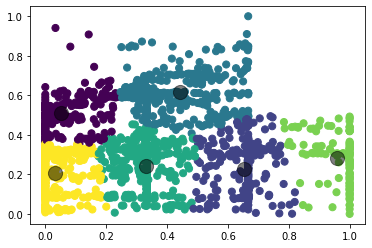

In [ ]:
#Select columns for X
X = Obese[['FAF', 'Weight']]

true_class = Obese['OBESITY']
print(X)
print("\n")
print(true_class)
print("\n")

#Perform Clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")

#Print off the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
#Note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")

#Evaluate Clustering Performance
#adjusted Rand index is a function that measures the similarity of the two assignments,
#ignoring permutations and with chance normalization
print(metrics.adjusted_rand_score(true_class, cluster_class))

print("\n")

#Plot the graphs
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X['FAF'], X['Weight'], c=y_kmeans, s=50, cmap='viridis')

#plot the centers
centers = kmeans.cluster_centers_
print("Center for cluster 0 is ", centers[0])
print("Center for cluster 1 is ", centers[1])
print("Center for cluster 2 is ", centers[2])
print("Center for cluster 3 is ", centers[3])
print("Center for cluster 4 is ", centers[4])
print("Center for cluster 5 is ", centers[5])
print("\n")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
#Challenge - plot the centers with labels (0-5)
#Resource https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python

#Prediction of cluster
input = [[20.0, 93.6]]
pred_cluster = kmeans.predict(input)
print("The predicted cluster is ")
print(pred_cluster)


input2 = [[65.0, 83.6]]
pred_cluster2 = kmeans.predict(input2)
print("The predicted cluster  is ")
print(pred_cluster2)

input3 = [[14.8, 110.0]]
pred_cluster3 = kmeans.predict(input3)
print("The predicted cluster  is ")
print(pred_cluster3)




In [ ]:
# K-means: centroids-based clustering
X_clust = Obese_ord_enc.iloc[:, [17,25]].values
print(X_clust)

[[0.         1.        ]
 [1.         1.        ]
 [0.66666667 1.        ]
 ...
 [0.471403   6.        ]
 [0.37970233 6.        ]
 [0.34215067 6.        ]]


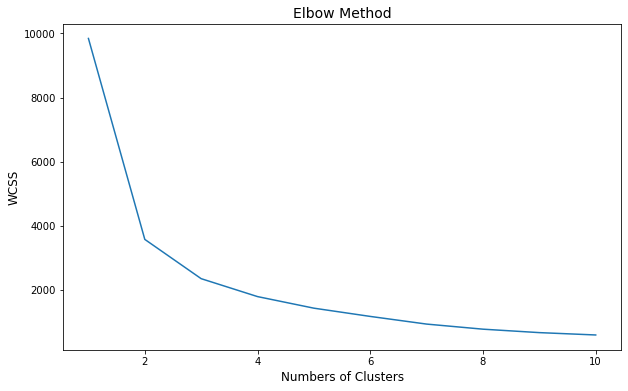

In [ ]:
# Elbow Method: is use to find out the number of clusters in K-means
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_clust)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.xlabel('Numbers of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Elbow Method', fontsize=14)
plt.show()

In [ ]:
k = 8
kmeans = KMeans(n_clusters = 7, random_state = 0)
pred_k = kmeans.fit_predict(X_clust)
print(pred_k)

[6 6 6 ... 5 5 5]


In [ ]:
Obese_kmeans = Obese.copy()
Obese_kmeans['Cluster'] = pred_k
print(Obese_kmeans.head())

   Gender       Age    Height    Weight Family History with Overweight FAVC  \
0  Female  0.148936  0.320755  0.186567                            yes   no   
1  Female  0.148936  0.132075  0.126866                            yes   no   
2    Male  0.191489  0.660377  0.283582                            yes   no   
3    Male  0.276596  0.660377  0.358209                             no   no   
4    Male  0.170213  0.622642  0.379104                             no   no   

   FCVC       NCP       CAEC SMOKE  CH2O  SCC       FAF  TUE        CALC  \
0   0.5  0.666667  Sometimes    no   0.5   no  0.000000  0.5          no   
1   1.0  0.666667  Sometimes   yes   1.0  yes  1.000000  0.0   Sometimes   
2   0.5  0.666667  Sometimes    no   0.5   no  0.666667  0.5  Frequently   
3   1.0  0.666667  Sometimes    no   0.5   no  0.666667  0.0  Frequently   
4   0.5  0.000000  Sometimes    no   0.5   no  0.000000  0.0   Sometimes   

                  MTRANS  OBESITY  Cluster  
0  Public_Transportatio

In [ ]:
boolArray = Obese_kmeans['Cluster'] == 0
print(Obese_kmeans[boolArray])

      Gender       Age    Height    Weight Family History with Overweight  \
68      Male  0.340426  0.584906  0.544776                            yes   
90    Female  0.234043  0.339623  0.402985                             no   
165     Male  0.340426  0.886792  0.679104                            yes   
197     Male  0.574468  0.566038  0.589552                            yes   
210     Male  0.127660  0.660377  0.559701                            yes   
...      ...       ...       ...       ...                            ...   
1794    Male  0.354094  0.384672  0.474507                            yes   
1795    Male  0.129116  0.390815  0.496869                            yes   
1796    Male  0.147114  0.367455  0.463194                            yes   
1797    Male  0.244937  0.397662  0.487474                            yes   
1798    Male  0.273294  0.455679  0.474591                            yes   

     FAVC      FCVC       NCP        CAEC SMOKE      CH2O  SCC       FAF  \

In [ ]:
# Performance Metrics
kmeans_metrics = silhouette_score(X_clust, kmeans.labels_, metric = 'euclidean')
print('The Silhouette_Score of K-means is: {:0.2f}'.format(kmeans_metrics))

The Silhouette_Score of K-means is: 0.72


**DEEP LEARNING**

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
targetVariable = 'OBESITY'
# split into input (X) and output (y) variable
feature_cols = ['Age','Height','Weight','FCVC', 'NCP','CH2O','FAF','TUE']
expectedNumberOfFeatures = len(feature_cols)
X = Obese[feature_cols] # Features
Y = Obese[targetVariable]
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(expectedNumberOfFeatures,), activation='relu'))
model.add(Dense(expectedNumberOfFeatures, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
209/209 [==============================] - 1s 2ms/step - loss: -8.7609 - accuracy: 0.1351
Epoch 2/150
209/209 [==============================] - 0s 2ms/step - loss: -92.9488 - accuracy: 0.1351
Epoch 3/150
209/209 [==============================] - 1s 2ms/step - loss: -371.7632 - accuracy: 0.1351
Epoch 4/150
209/209 [==============================] - 0s 2ms/step - loss: -941.3476 - accuracy: 0.1351
Epoch 5/150
209/209 [==============================] - 0s 2ms/step - loss: -1889.0383 - accuracy: 0.1351
Epoch 6/150
209/209 [==============================] - 0s 2ms/step - loss: -3288.2402 - accuracy: 0.1351
Epoch 7/150
209/209 [==============================] - 0s 2ms/step - loss: -5184.5195 - accuracy: 0.1351
Epoch 8/150
209/209 [==============================] - 0s 2ms/step - loss: -7620.3887 - accuracy: 0.1351
Epoch 9/150
209/209 [==============================] - 0s 2ms/step - loss: -10639.0605 - accuracy: 0.1351
Epoch 10/150
209/209 [==============================] - 0s 2m

In [ ]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.regularizers import l2
from numpy import array
import time
start_time = time.time()

In [ ]:
import time
start_time = time.time()

Obesity levels are:  (['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'],)
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 14)                126       
                                                                 
 activation_12 (Activation)  (None, 14)                0         
                                                                 
 dense_82 (Dense)            (None, 64)                960       
                                                                 
 activation_13 (Activation)  (None, 64)                0         
                                                                 
 dense_83 (Dense)            (None, 7)                 455       
                                                                 
 activation_14 (Ac

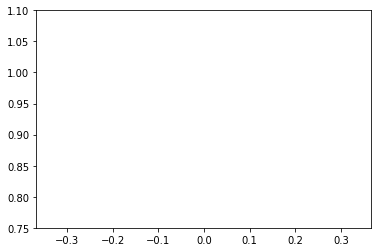


Execution Time 6433.795858383179 seconds: 
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 14)                126       
                                                                 
 activation_15 (Activation)  (None, 14)                0         
                                                                 
 dense_85 (Dense)            (None, 64)                960       
                                                                 
 activation_16 (Activation)  (None, 64)                0         
                                                                 
 dense_86 (Dense)            (None, 7)                 455       
                                                                 
 activation_17 (Activation)  (None, 7)                 0         
                                                                 
Total par

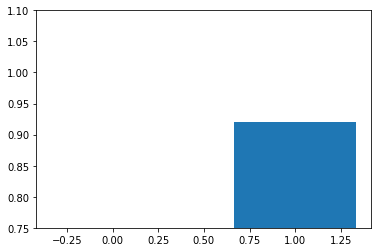


Execution Time 6442.593078136444 seconds: 
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 14)                126       
                                                                 
 activation_18 (Activation)  (None, 14)                0         
                                                                 
 dense_88 (Dense)            (None, 64)                960       
                                                                 
 activation_19 (Activation)  (None, 64)                0         
                                                                 
 dense_89 (Dense)            (None, 7)                 455       
                                                                 
 activation_20 (Activation)  (None, 7)                 0         
                                                                 
Total par

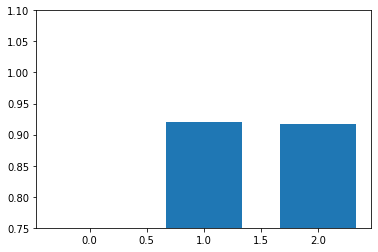


Execution Time 6453.874374628067 seconds: 


In [ ]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.regularizers import l2
from numpy import array
import time
start_time = time.time()

#Initialisation
No_classes = 7
test_split = 0.25
ver_bose = 1
batchsize = 128

class_names=['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II'],

print("Obesity levels are: ", class_names)

targetVariable = 'OBESITY'
# split into input (X) and output (y) variable
feature_cols = ['Age','Height','Weight','FCVC', 'NCP','CH2O','FAF','TUE']
expectedNumberOfFeatures = len(feature_cols)
X = Obese[feature_cols] # Features
Y = Obese[targetVariable]



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#Step 3 Preprocess the X training data by Scaling
sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

#Step3.1 Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

#Step 3.2 Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

#Step 4 convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, No_classes)
y_test  = np_utils.to_categorical(y_test, No_classes)

#Step 5 Create and Implement Deep Learning Model
accuracy = []
for OPTIMIZER in [SGD(), RMSprop(), Adam()]:
    for epoch_no in [100]:
        for neurons_no in [64]:
            #Step 5.1 Create the NN architecture
            model = Sequential()
            #Input Layer
            model.add(Dense(units = 14, input_shape=(X_train.shape[1],), kernel_regularizer=l2()))
            model.add(Activation('relu'))
            #Hiden Layer
            model.add(Dense(units = neurons_no, kernel_regularizer=l2()))
            model.add(Activation('relu'))
            #Output Layer
            model.add(Dense(units = No_classes))
            model.add(Activation('softmax'))
            model.summary()
            #Compile and fit the model
            model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
            model.fit(X_train_std, y_train, batch_size=batchsize, epochs=epoch_no,verbose=ver_bose, validation_split=test_split)
            #Evaluate the model
            score = model.evaluate(X_test_std, y_test, verbose=ver_bose)

            #Print Outputs
            print()
            print('Optimizers: ', OPTIMIZER)
            print('Epoch Sizes: ', epoch_no)
            print('Neurons or Units: ', neurons_no)
            print("Test score:", score[0])
            print('Test accuracy:', score[1])
            accuracy.append(score[1])
            print()

    print(accuracy)
    y = accuracy; N = len(y); x = range(N); width = 1./1.5;
    plt.ylim(0.75,1.1)
    plt.bar(x,y,width); plt.show()

    print()
    print("Execution Time %s seconds: " % (time.time() - start_time))


In [ ]:
!pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
targetVariable = 'OBESITY'
# split into input (X) and output (y) variable
feature_cols = ['Age','Height','Weight','FCVC', 'NCP','CH2O','FAF','TUE']
expectedNumberOfFeatures = len(feature_cols)
X = Obese[feature_cols] # Features
Y = Obese[targetVariable]

#Step 2 Split, train and test data
#Train, test and split the dataset. Random number generator, with popular integer see #numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

#Step 3 Preprocess the X training data by Scaling
sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

#Step3.1 Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

#Step 3.2 Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

# Step 5 create an deep NN model
#Output layer with 8 inputs
#1 hhidden layer with 64 neurons
#Output layer with 2 neurons for 2 classes (0,1)
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
print("\n")
print("Model Summary ")
print(model.summary())
print("\n")

#Step 6 Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Step 7 Fit Model
history = model.fit(X_train_std, y_train, batch_size=100, epochs=100, verbose=1, validation_split=0.20,)

#Use model for Prediction but have to transform it first
Xnew1 = array([[5,116,74,25.6,0.201,30,300,50]])
Xnew1_std = sc.transform(Xnew1)
Xnew2 = array([[6,148,7,35,0,33.6,0.627,50]])
Xnew2_std = sc.transform(Xnew2)

# make a prediction
ynew1 = model.predict_classes(Xnew1_std)
ynew2 = model.predict_classes(Xnew2_std)
# show the inputs and predicted outputs
print("\n")
print("The predicted classification for X1 ", Xnew1_std)
print("Is :", ynew1)
print("\n")
print("The predicted classification for X2 ", Xnew2_std)
print("Is :", ynew2)
print("\n")

#Evaluate the model
score = model.evaluate(X_test_std, y_test, verbose=1)
print("Names of the score metrics in model evaluation are: ")
print(model.metrics_names)
print("The score values are: Loss (Categorical Cross Entropy) and Accuracy (%)")
print(score)
print("\n")

# list all data in history
print(history.history.keys())
print("\n")

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()





Model Summary 
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 8)                 72        
                                                                 
 dense_91 (Dense)            (None, 64)                576       
                                                                 
 dense_92 (Dense)            (None, 2)                 130       
                                                                 
Total params: 778
Trainable params: 778
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100


ValueError: ignored